In [5]:
import shelve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
def plot(name, t, scale):
    def _plot(xlabel, ylabel, t, p):
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        for s in ['central', 'avgmix', 'power1', 'power2', 'pow1ws', 'pow2ws']:
            if xlabel == "Epoch":
                x = range(t)
            elif xlabel == "Time":
                x = db[s].time[0:t]
            else:
                error

            if ylabel == "Risk":
                y = db[s].risk[0:t]
            elif ylabel == "Good":
                y = db[s].good[0:t]
            else:
                error
            p(x, y, '.-', label = s)
        plt.grid()
        
    db = shelve.open(name + "/evaluate")
    plt.figure(figsize=(10,10))
    file = name + '_' + scale + '.png'
    plt.suptitle(name, fontsize = 15)
    if scale == "unif":
        p = plt.plot
    elif scale == "log":
        p = plt.semilogy
    else:
        error
    
    plt.subplot(2, 2, 1)
    _plot("Epoch", "Risk", 10, p)
    plt.subplot(2, 2, 2)
    _plot("Time", "Risk", 10, p)
    plt.subplot(2, 2, 3)
    _plot("Epoch", "Good", 10, p)
    plt.subplot(2, 2, 4)
    _plot("Time", "Good", 10, p)
    
    plt.legend(loc = "best")
    plt.savefig(file)
    db.close()

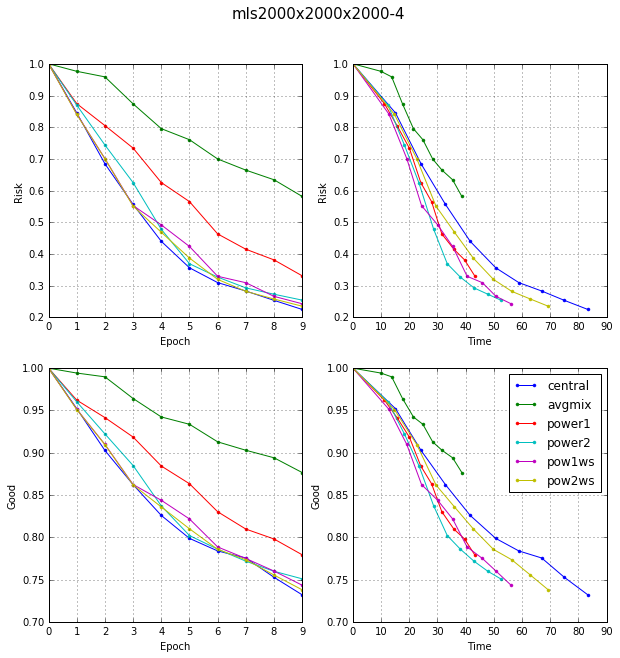

In [102]:
plot("mls2000x2000x2000-4", 10, 'unif')